In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np

# FFT Explained

Let's generate a signal that will last `time` $units$ (e.g. seconds).<br>
Imagine we sample it with `freq` samples per unit of signal frequency (e.g. Hertz).<br>
That means we get `N` samples with `T` sample spacing.

Let's compose our signal of 3 different frequencies:
$$
y = 3*sin(17*2\pi x)+5*sin(23*2\pi x)+7*sin(29*2\pi x)
$$
Yes, 17, 23, 29 are primes as well as 3, 5 and 7. Let's plot it:

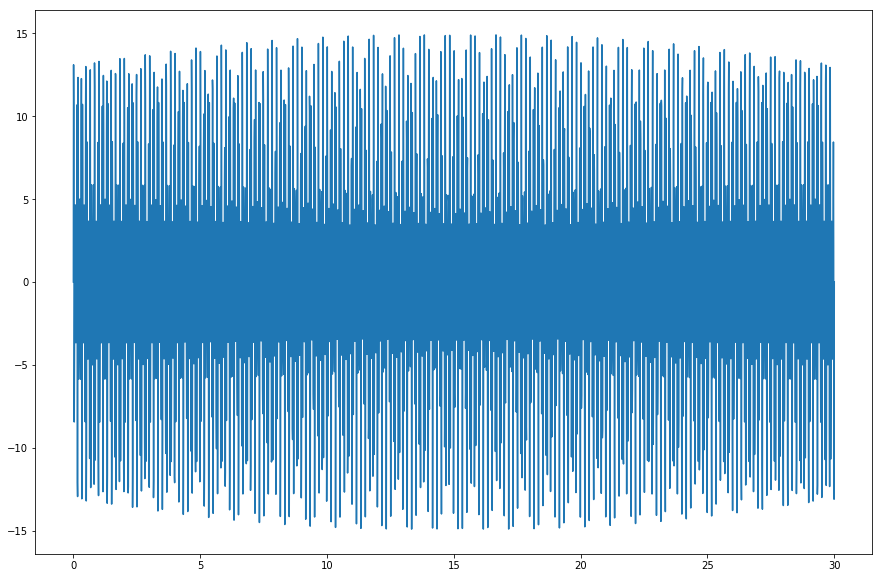

In [3]:
time = 30.0
# sampling frequency
freq = 120  # N * time
# number of samples
N = int(freq*time)
# sample "spacing"
T = 1/freq

x = np.linspace(0.0, time, N)
y = 7*np.sin(17*2.0*np.pi*x) + 5*np.sin(23*2.0*np.pi*x) + 3*np.sin(29*2.0*np.pi*x)# + 14*np.random.randn(x.size)

fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(x, y)

Zooming in on one unit of signal:

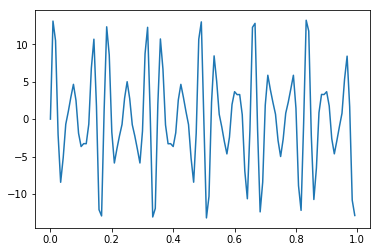

In [4]:
plt.plot(x[:freq], y[:freq])

There's clearly some regularity and symmetry in it though it's really hard to see what it's composed of. 

Now let's move to the FFT and see what it's capable of. Is it able to identify the underlaying components?

## FFT in the play

One thing to note is that due to [Nyquist–Shannon sampling theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem) FFT is able to recognize signals with frequencies up to half of the sampling rate. Also FFT [returns positive and negative frequency terms](https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html#one-dimensional-discrete-fourier-transforms), since in most common scenarios those terms are symmetric they can either be summed or usually only the positive frequency is plotted (in which case it is multiplied by 2).

Due to that in the following code we plot only half of data`yf[:N//2]` and multiply values by`2` while normalizing to number of samples`/N` which you can find in following term calculating`yf`:
```
yf = 2.0*np.abs(yf[:N//2])/N
```

We perform similar operation calculating the `xf` term, spanning `xf` for half of frequency range with only half of the steps to match number of samples we took into consideration while calculating `yf`.

In [5]:
from scipy.fftpack import fft, fftfreq, fftshift

17.0

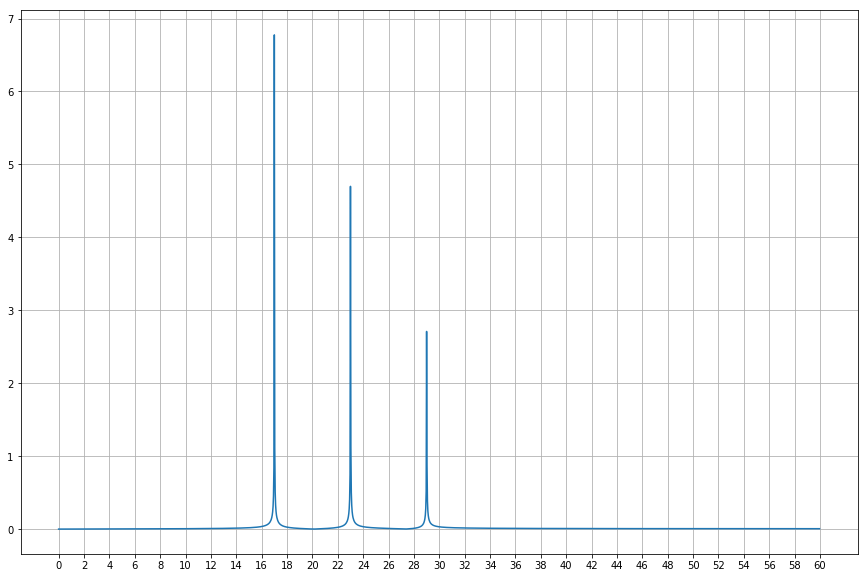

In [6]:
yf = fft(y)
yf = 2.0*np.abs(yf[:N//2])/N
xf = np.linspace(0.0, freq/2.0, N//2)
# the above is almost equivalent same as:
xf = fftfreq(N, T)
xf = fftshift(xf)[N//2:]

fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(xf, yf)
plt.grid()
x_max = freq//2
_ = plt.xticks(np.linspace(0, x_max, 31))
xf[yf.argmax()]

As you can see we there are clearly 3 spikes at 3 different frequencies perfectly corresponding to our composites.

We chose our input in such way that both amplitudes 7, 5 and 3 (our original components' value multipliers almost perfectly matching spikes' y coordinates) and frequencies 17, 23 and 29 (spikes' x coordinates) can be read from the chart.


## Fun with FFT

The real fun with FFT happens when you analyze signal that if full of noise. As long as noise doesn't overwhelm the signal (both with terms of frequency and amplitude) you should be able to entangle the original components almost as there would be no noise.

Let's start by adding noise to our original signal from previous example. The noise is quite large, its maximum amplitude (14) is twice the strongest signal component and almost 5 times the weakest. Although noise is normally distributed around 0 the mean of its absolute value is around 11.2 (it's equal the magnitude of distortion that impacts the original signal).

In [8]:
np.mean(np.abs(14*np.random.randn(10000000)))

11.166863360530957

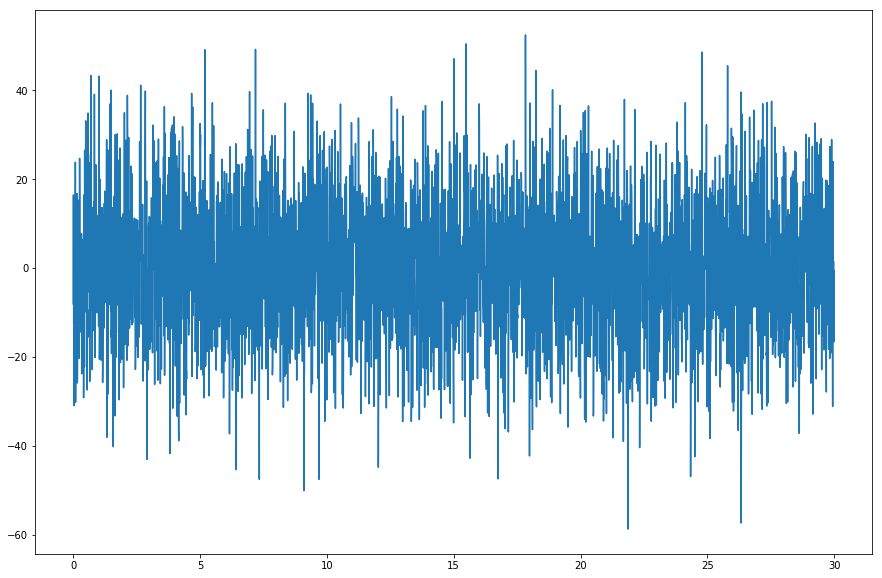

In [17]:
y = 7*np.sin(17*2.0*np.pi*x) + 5*np.sin(23*2.0*np.pi*x) + 3*np.sin(29*2.0*np.pi*x) + 14*np.random.randn(x.size)

fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(x, y)

Zooming in on original signal we're completely unable to find any regularities. It looks pretty much completely random containing no visible components at this scale.

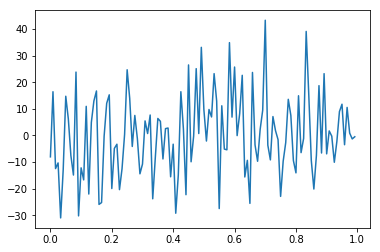

In [18]:
plt.plot(x[:freq], y[:freq])

Yet plugging in this signal to FFT we can clearly recognize our original signal components with both frequency and amplitudes quite apparent despite the noise visible at all frequencies. 

17.0

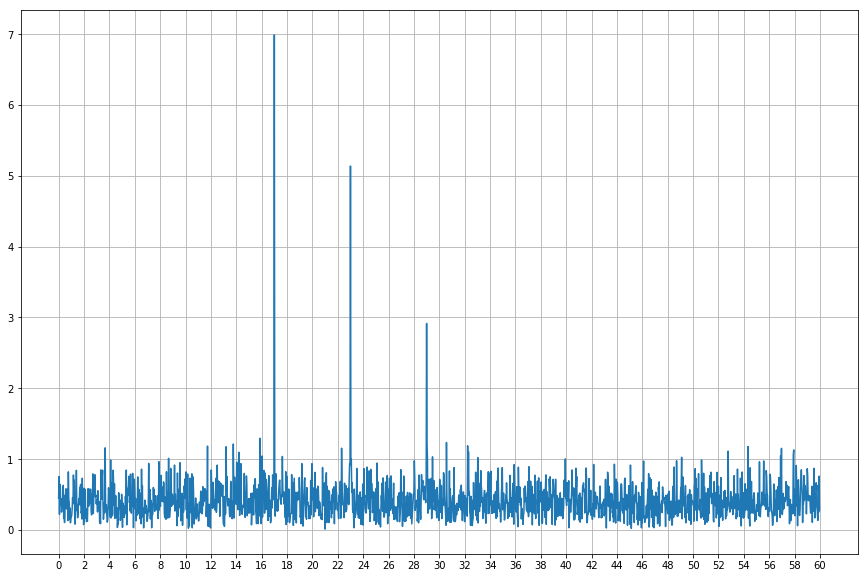

In [19]:
yf = fft(y)
yf = 2.0*np.abs(yf[:N//2])/N
xf = np.linspace(0.0, freq/2.0, N//2)
# the above is almost equivalent same as:
xf = fftfreq(N, T)
xf = fftshift(xf)[N//2:]

fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(xf, yf)
plt.grid()
x_max = freq//2
_ = plt.xticks(np.linspace(0, x_max, 31))
xf[yf.argmax()]

### Adding more noise

Now let's try to add another noise but this time in time domain. We do so by slightly shifting the x coordinates used to obtain the sine value of our first and largest component.

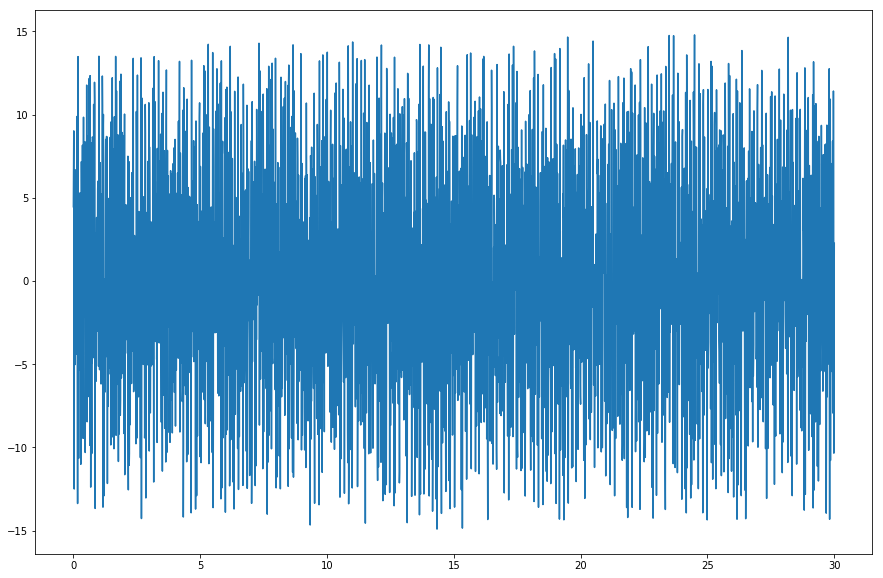

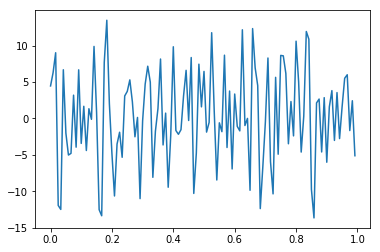

In [12]:
y = 7*np.sin(17*2.0*np.pi*x+(np.random.randn(x.size)/2.0*np.pi)) + 5*np.sin(23*2.0*np.pi*x) + 3*np.sin(29*2.0*np.pi*x)

fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(x, y)
plt.show()
plt.plot(x[:freq], y[:freq])

This time we find that while our original components are still visible the first and strongest one became weakest. It's kind of obvious as we smeared it over time ultimately weakening it.

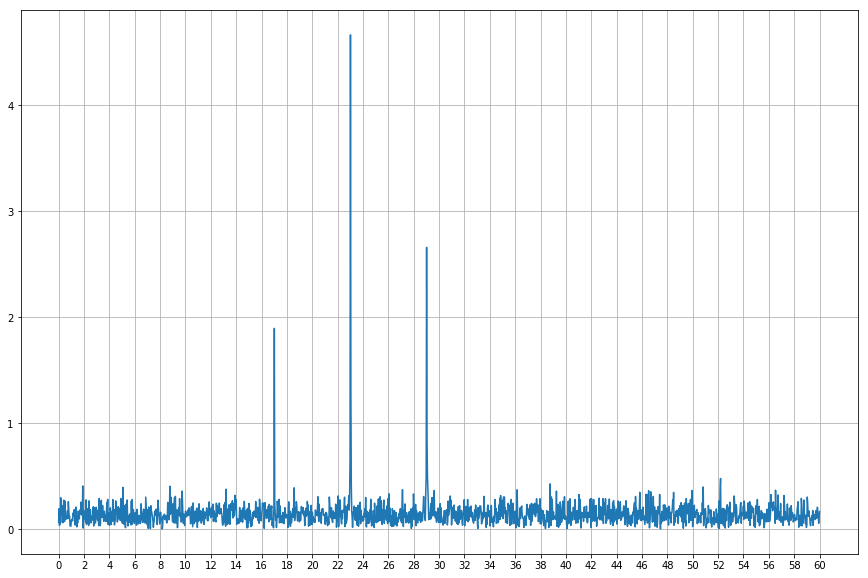

In [13]:
yf = fft(y)
yf = 2.0*np.abs(yf[:N//2])/N
xf = np.linspace(0.0, freq/2.0, N//2)
# the above is the same as:
# xf = fftfreq(N, T)
# xf = fftshift(xf)[N//2:]

fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(xf, yf)
plt.grid()
x_max = freq//2
_ = plt.xticks(np.linspace(0, x_max, 31))

What happens to the original signal becomes more apparent if we plot just the smeared component.

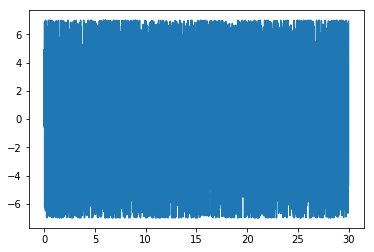

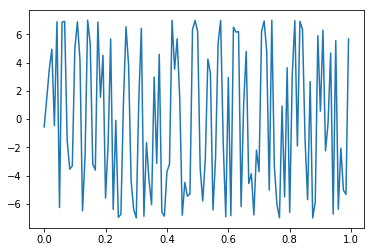

In [14]:
y = 7*np.sin(17*2.0*np.pi*x+(np.random.randn(x.size)/2.0*np.pi))

plt.plot(x, y)
plt.show()
plt.plot(x[:freq], y[:freq])

17.0

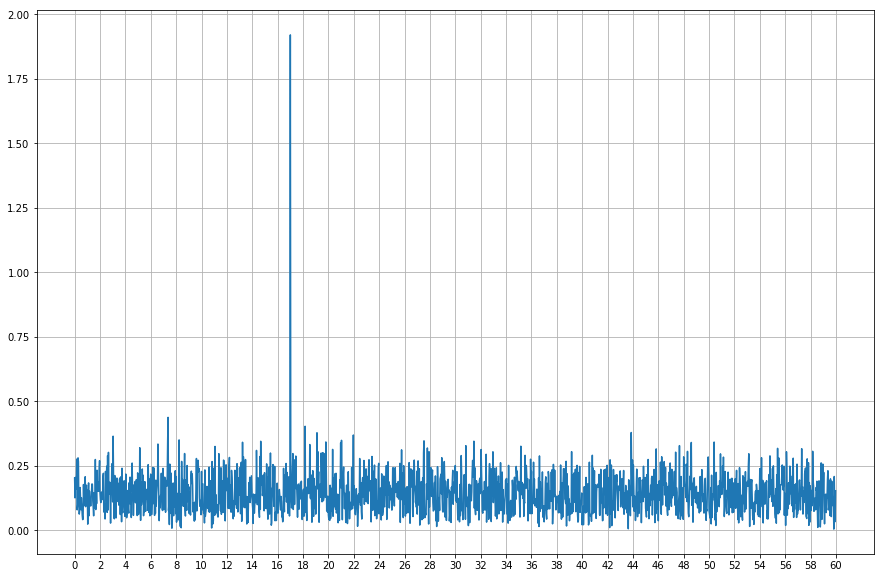

In [15]:
yf = fft(y)
yf = 2.0*np.abs(yf[:N//2])/N
xf = np.linspace(0.0, freq/2.0, N//2)
# the above is almost equivalent same as:
xf = fftfreq(N, T)
xf = fftshift(xf)[N//2:]

fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(xf, yf)
plt.grid()
x_max = freq//2
_ = plt.xticks(np.linspace(0, x_max, 31))
xf[yf.argmax()]